<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [3]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [6]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [9]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

In [13]:
import keras
print(keras.__version__)

3.11.1


In [16]:
print(tensorflow.__version__)

2.16.2


In [19]:
# Reproducibility set up

# Set random seed for numpy
np.random.seed(42)

# Set random seed for TensorFlow
tensorflow.random.set_seed(42)
tensorflow.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tensorflow.config.experimental.enable_op_determinism()

In [22]:
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [27]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


In [31]:
# insert code here
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]


In [34]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')


## Check some data

In [37]:
# insert code here
def check_one(data, label, id = None, actual = None, compare = False):
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)


    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):

        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [40]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

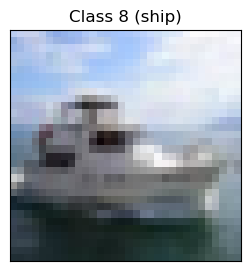

In [43]:
check_one(X_train, t_train.flatten())

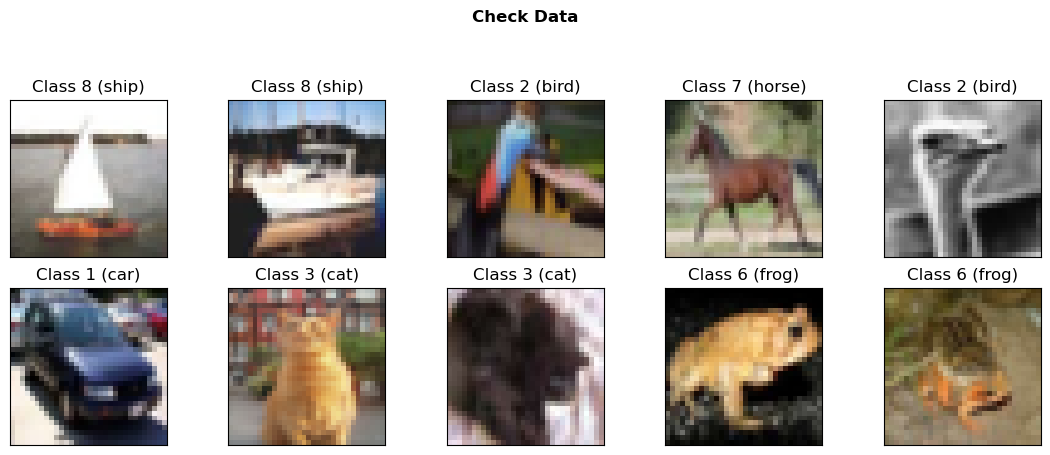

In [46]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [49]:
# insert code here

_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

y_train = to_categorical(
    t_train,
    num_classes = num_classes)
y_test = to_categorical(
    t_test,
    num_classes = num_classes)

In [52]:
t_train[0]

array([6], dtype=uint8)

In [55]:
y_train[0]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [69]:
# insert code here
model = Sequential()

In [71]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [74]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 96)     │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 192)      │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,410 (4.47 MB)

 Trainable params: 1,172,410 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compile the model

In [80]:
# insert code here
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the training data

In [83]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

log_dir = 'logs'

if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [86]:
tensorboard = TensorBoard(log_dir = 'logs')

In [90]:
%%time


history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 127s 309ms/step - accuracy: 0.2152 - loss: 2.1518 - val_accuracy: 0.3635 - val_loss: 1.7385
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 122s 305ms/step - accuracy: 0.3859 - loss: 1.6572 - val_accuracy: 0.4756 - val_loss: 1.4383
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 123s 307ms/step - accuracy: 0.4705 - loss: 1.4554 - val_accuracy: 0.5336 - val_loss: 1.2656
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 123s 307ms/step - accuracy: 0.5282 - loss: 1.3186 - val_accuracy: 0.5755 - val_loss: 1.1797
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 122s 305ms/step - accuracy: 0.5690 - loss: 1.2187 - val_accuracy: 0.6383 - val_loss: 1.0210
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 123s 307ms/step - accuracy: 0.6022 - loss: 1.1393 - val_accuracy: 0.6562 - val_loss: 0.9762
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 123s 306ms/step - accuracy: 0.6273 - loss: 1.0785 - val_accuracy: 0.6597 - val_loss: 0.9577
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 122s 305ms/step - accuracy: 

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [94]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14946), started 0:00:00 ago. (Use '!kill 14946' to kill it.)

In [95]:
# Uncomment and run the code below if unable to visualise TensorBoard a second time.
#%reload_ext tensorboard
#%tensorboard --logdir logs --port=6007

%tensorboard --logdir logs --port 6007

## Create predictions

In [98]:
# insert code here
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


## Evaluate the model

In [ ]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

In [101]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [103]:
# Convert predicted probabilities to class labels
predictions_class = np.argmax(predictions, axis=1)

# Convert y_test to class indices for comparison with predictions
y_test_target = np.argmax(y_test, axis = 1)

# Now use these class labels to compute the confusion matrix
cm = confusion_matrix(y_test_target, predictions_class)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 779  25  28  21  23   2   9  14  59  40 
  1|   8 905   0   2   2   1   9   0  12  61 
  2|  69   3 610  42  86  34  99  43   7   7 
  3|  20   7  48 487  95 133 113  66   6  25 
  4|  12   2  29  36 783   8  63  54   4   9 
  5|   6   1  39 116  46 641  46  93   5   7 
  6|   7   2  19  17  14   5 922   7   6   1 
  7|  13   2   8  30  41  13  19 862   2  10 
  8|  44  37   7  11   4   1   4   8 847  37 
  9|  15  51   3   6   1   0   6   7  14 897 


In [105]:
print(type(y_test_target), type(predictions_class))
print(len(y_test_target), len(predictions_class))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
10000 10000


## Visualisation of cost

In [107]:
# insert code here
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


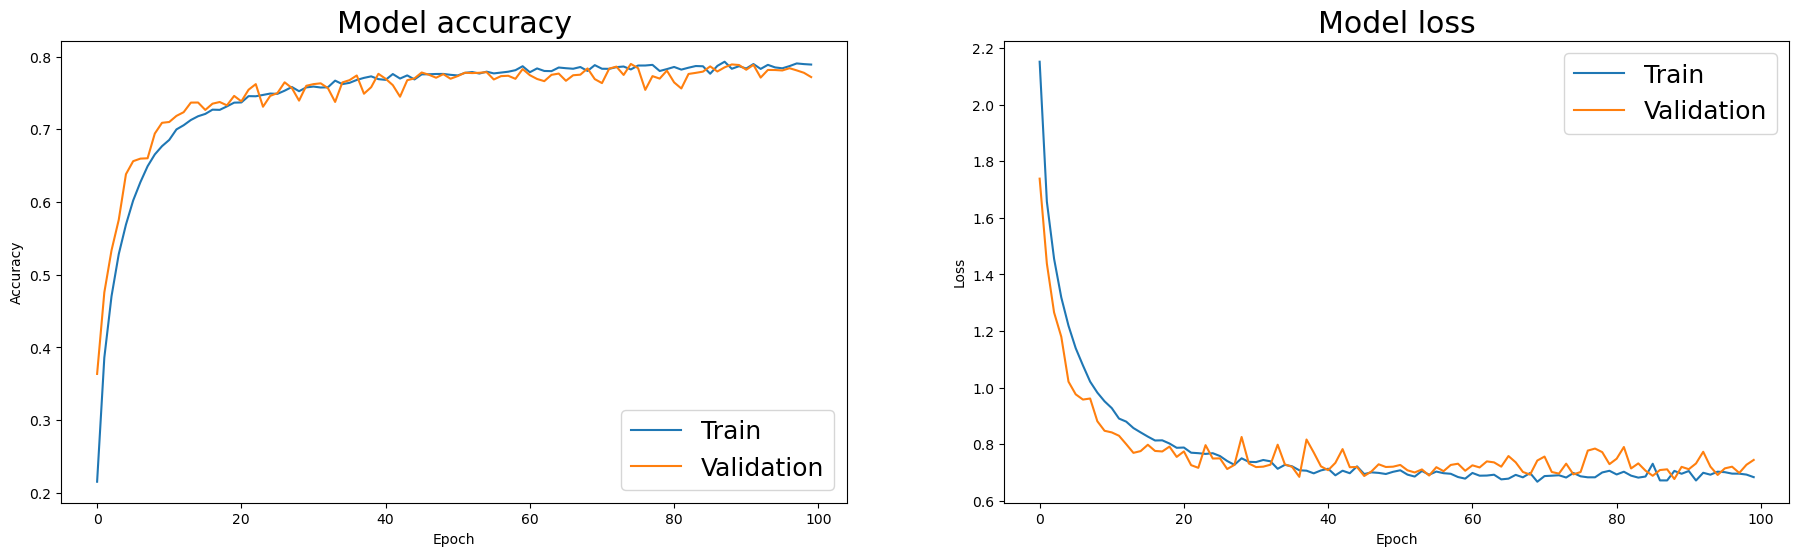

In [109]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

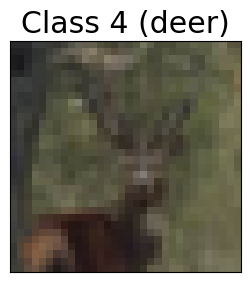

In [112]:
# insert code here
check_one(X_test, predictions_class, actual = y_test, compare = True)

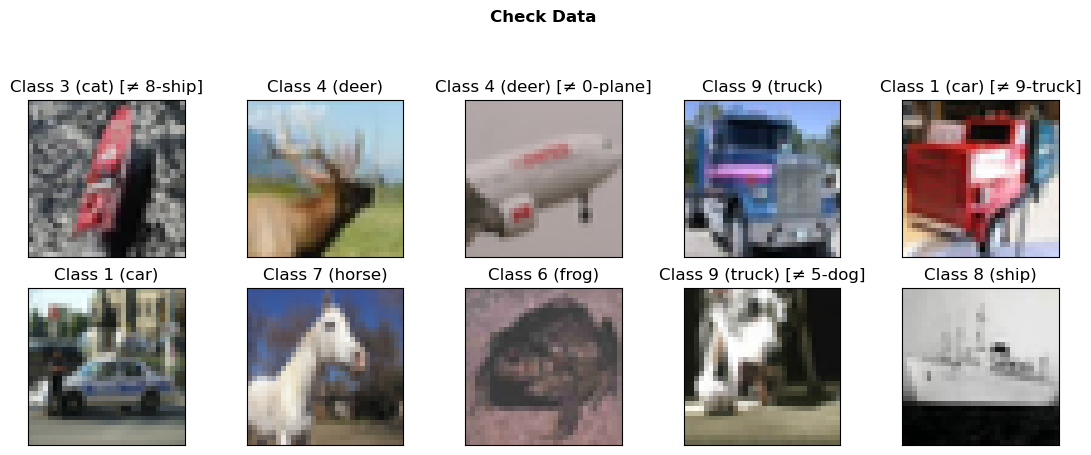

In [114]:
check_ten(X_test, predictions_class, y_test, True)

In [ ]:
# insert code here
check_one(X_test, predictions_class, actual = y_test, compare = True)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



